# Upgrading Scikit Learn Library

In [ ]:
!pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing Dependencies & Dataset


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection

In [ ]:
#loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/loan_approval_dataset.csv')

# Exploratory Data Analysis

In [ ]:
# first 5 rows in the dataset
loan_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# last 5 rows in the dataset
loan_dataset.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
# number of rows & columns
loan_dataset.shape

(4269, 13)

In [ ]:
# getting info about the dataset
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Ensure that there are no leading or trailing spaces in the column name.
loan_dataset.columns = loan_dataset.columns.str.strip()

In [ ]:
# checking null values
loan_dataset.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
# getting the stats about dataset
loan_dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
print(loan_dataset.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [ ]:
#number of labels
loan_dataset['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [ ]:
#setting the parameters
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['figure.dpi'] = 100

<Axes: xlabel='no_of_dependents', ylabel='count'>

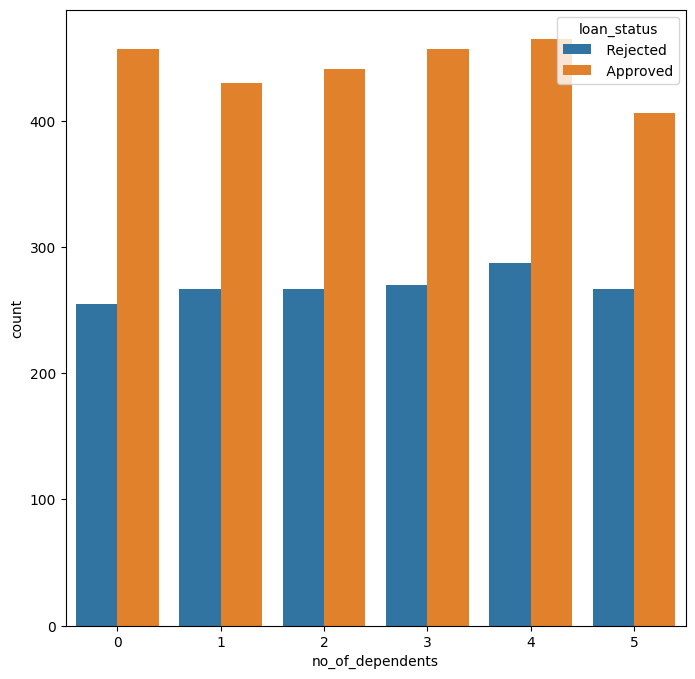

In [ ]:
#count plot for no of dependents
sns.countplot(x='no_of_dependents',data=loan_dataset,hue='loan_status')

<Axes: xlabel='education', ylabel='count'>

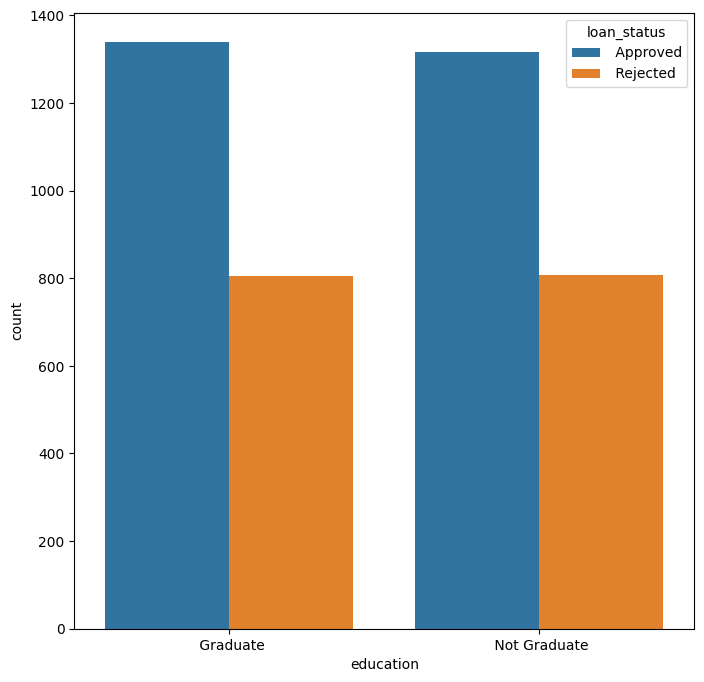

In [ ]:
#count plot for education
sns.countplot(x='education',data=loan_dataset,hue='loan_status')

<Axes: xlabel='self_employed', ylabel='count'>

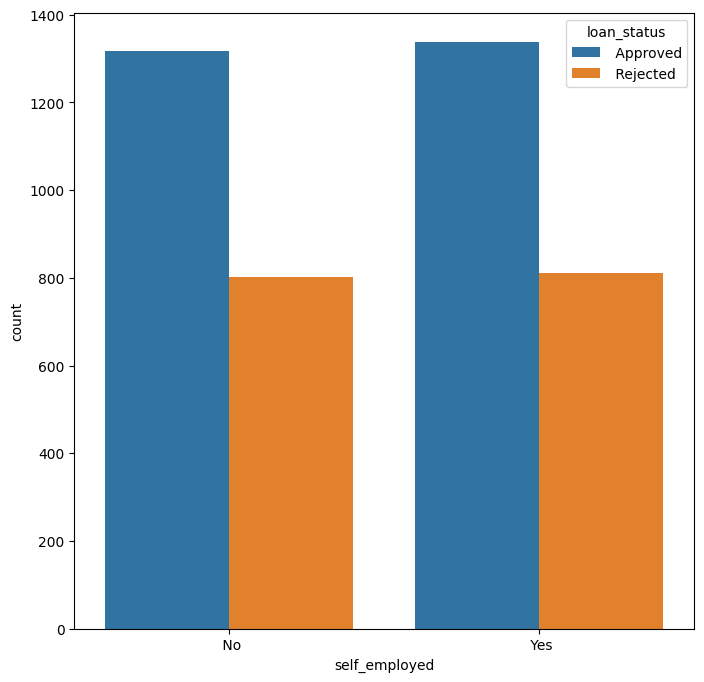

In [ ]:
#count plot for self_employed
sns.countplot(x='self_employed',data=loan_dataset,hue='loan_status')

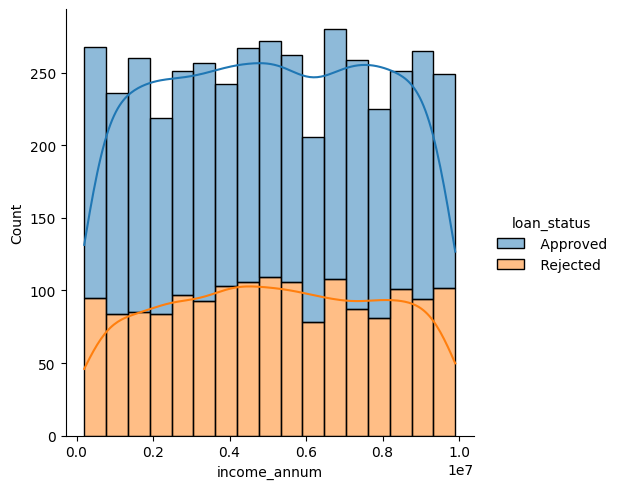

In [ ]:
# distribution plot for income_annum
sns.displot(data=loan_dataset, x = 'income_annum', kde=True,
           hue='loan_status', multiple='stack')

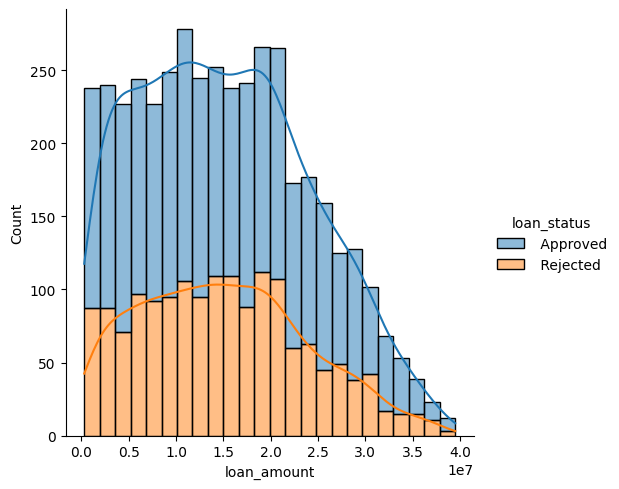

In [ ]:
# distribution plot for loan_amount
sns.displot(data=loan_dataset, x = 'loan_amount', kde=True,
           hue='loan_status', multiple='stack')

<Axes: xlabel='loan_term', ylabel='count'>

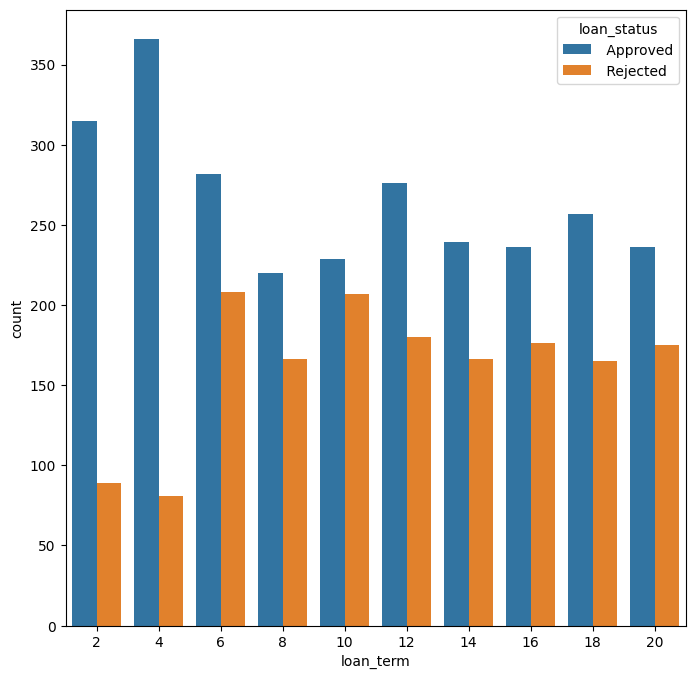

In [ ]:
#count plot for loan_term
sns.countplot(x='loan_term',data=loan_dataset,hue='loan_status')

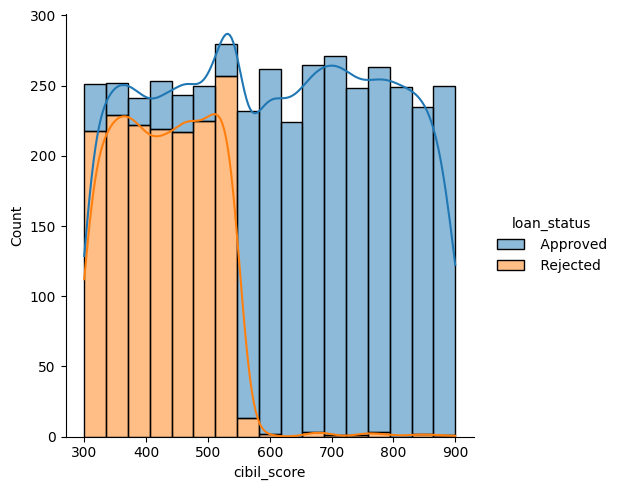

In [ ]:
# distribution plot for cibil_score
sns.displot(data=loan_dataset, x = 'cibil_score', kde=True,
           hue='loan_status', multiple='stack')

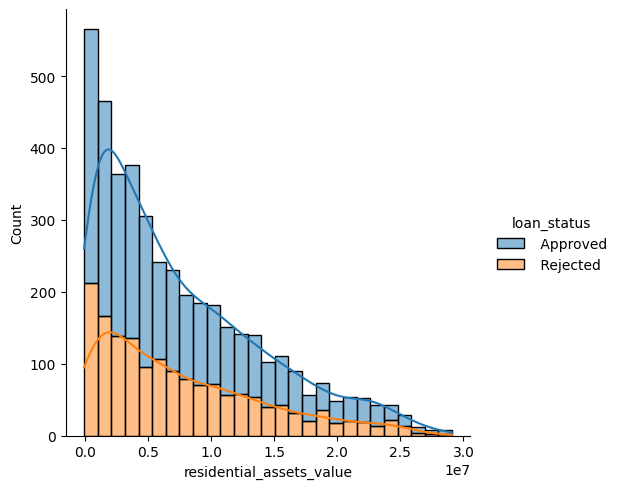

In [ ]:
# distribution plot for residential_assets_value
sns.displot(data=loan_dataset, x = 'residential_assets_value', kde=True,
           hue='loan_status', multiple='stack')

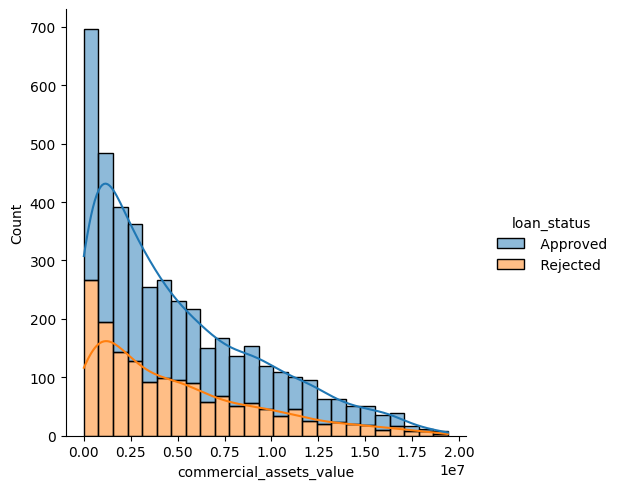

In [ ]:
# distribution plot for commercial_assets_value
sns.displot(data=loan_dataset, x = 'commercial_assets_value', kde=True,
           hue='loan_status', multiple='stack')

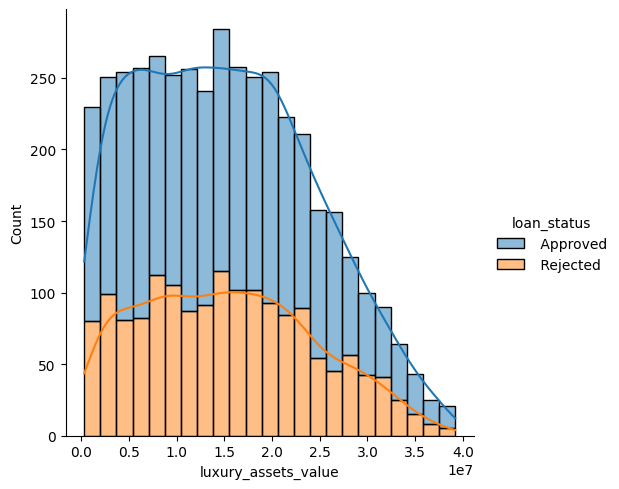

In [ ]:
# distribution plot for luxury_assets_value
sns.displot(data=loan_dataset, x = 'luxury_assets_value', kde=True,
           hue='loan_status', multiple='stack')

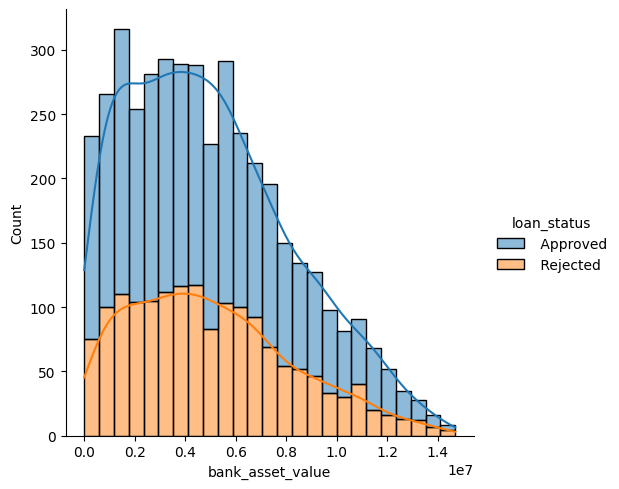

In [ ]:
# distribution plot for bank_asset_value
sns.displot(data=loan_dataset, x = 'bank_asset_value', kde=True,
           hue='loan_status', multiple='stack')

<Axes: xlabel='loan_status', ylabel='count'>

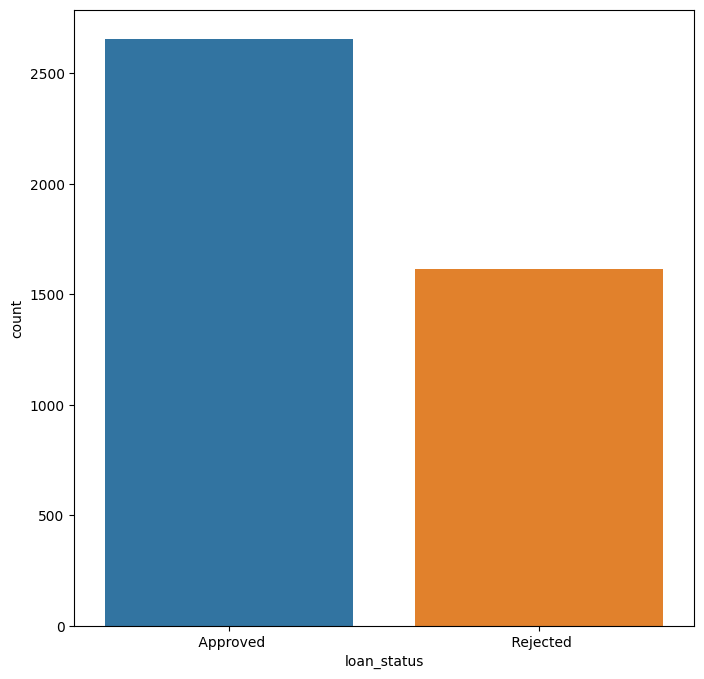

In [ ]:
#count plot for loan_status
sns.countplot(x='loan_status',data=loan_dataset,hue='loan_status')

In [ ]:
#setting the parameters
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['figure.dpi'] = 300

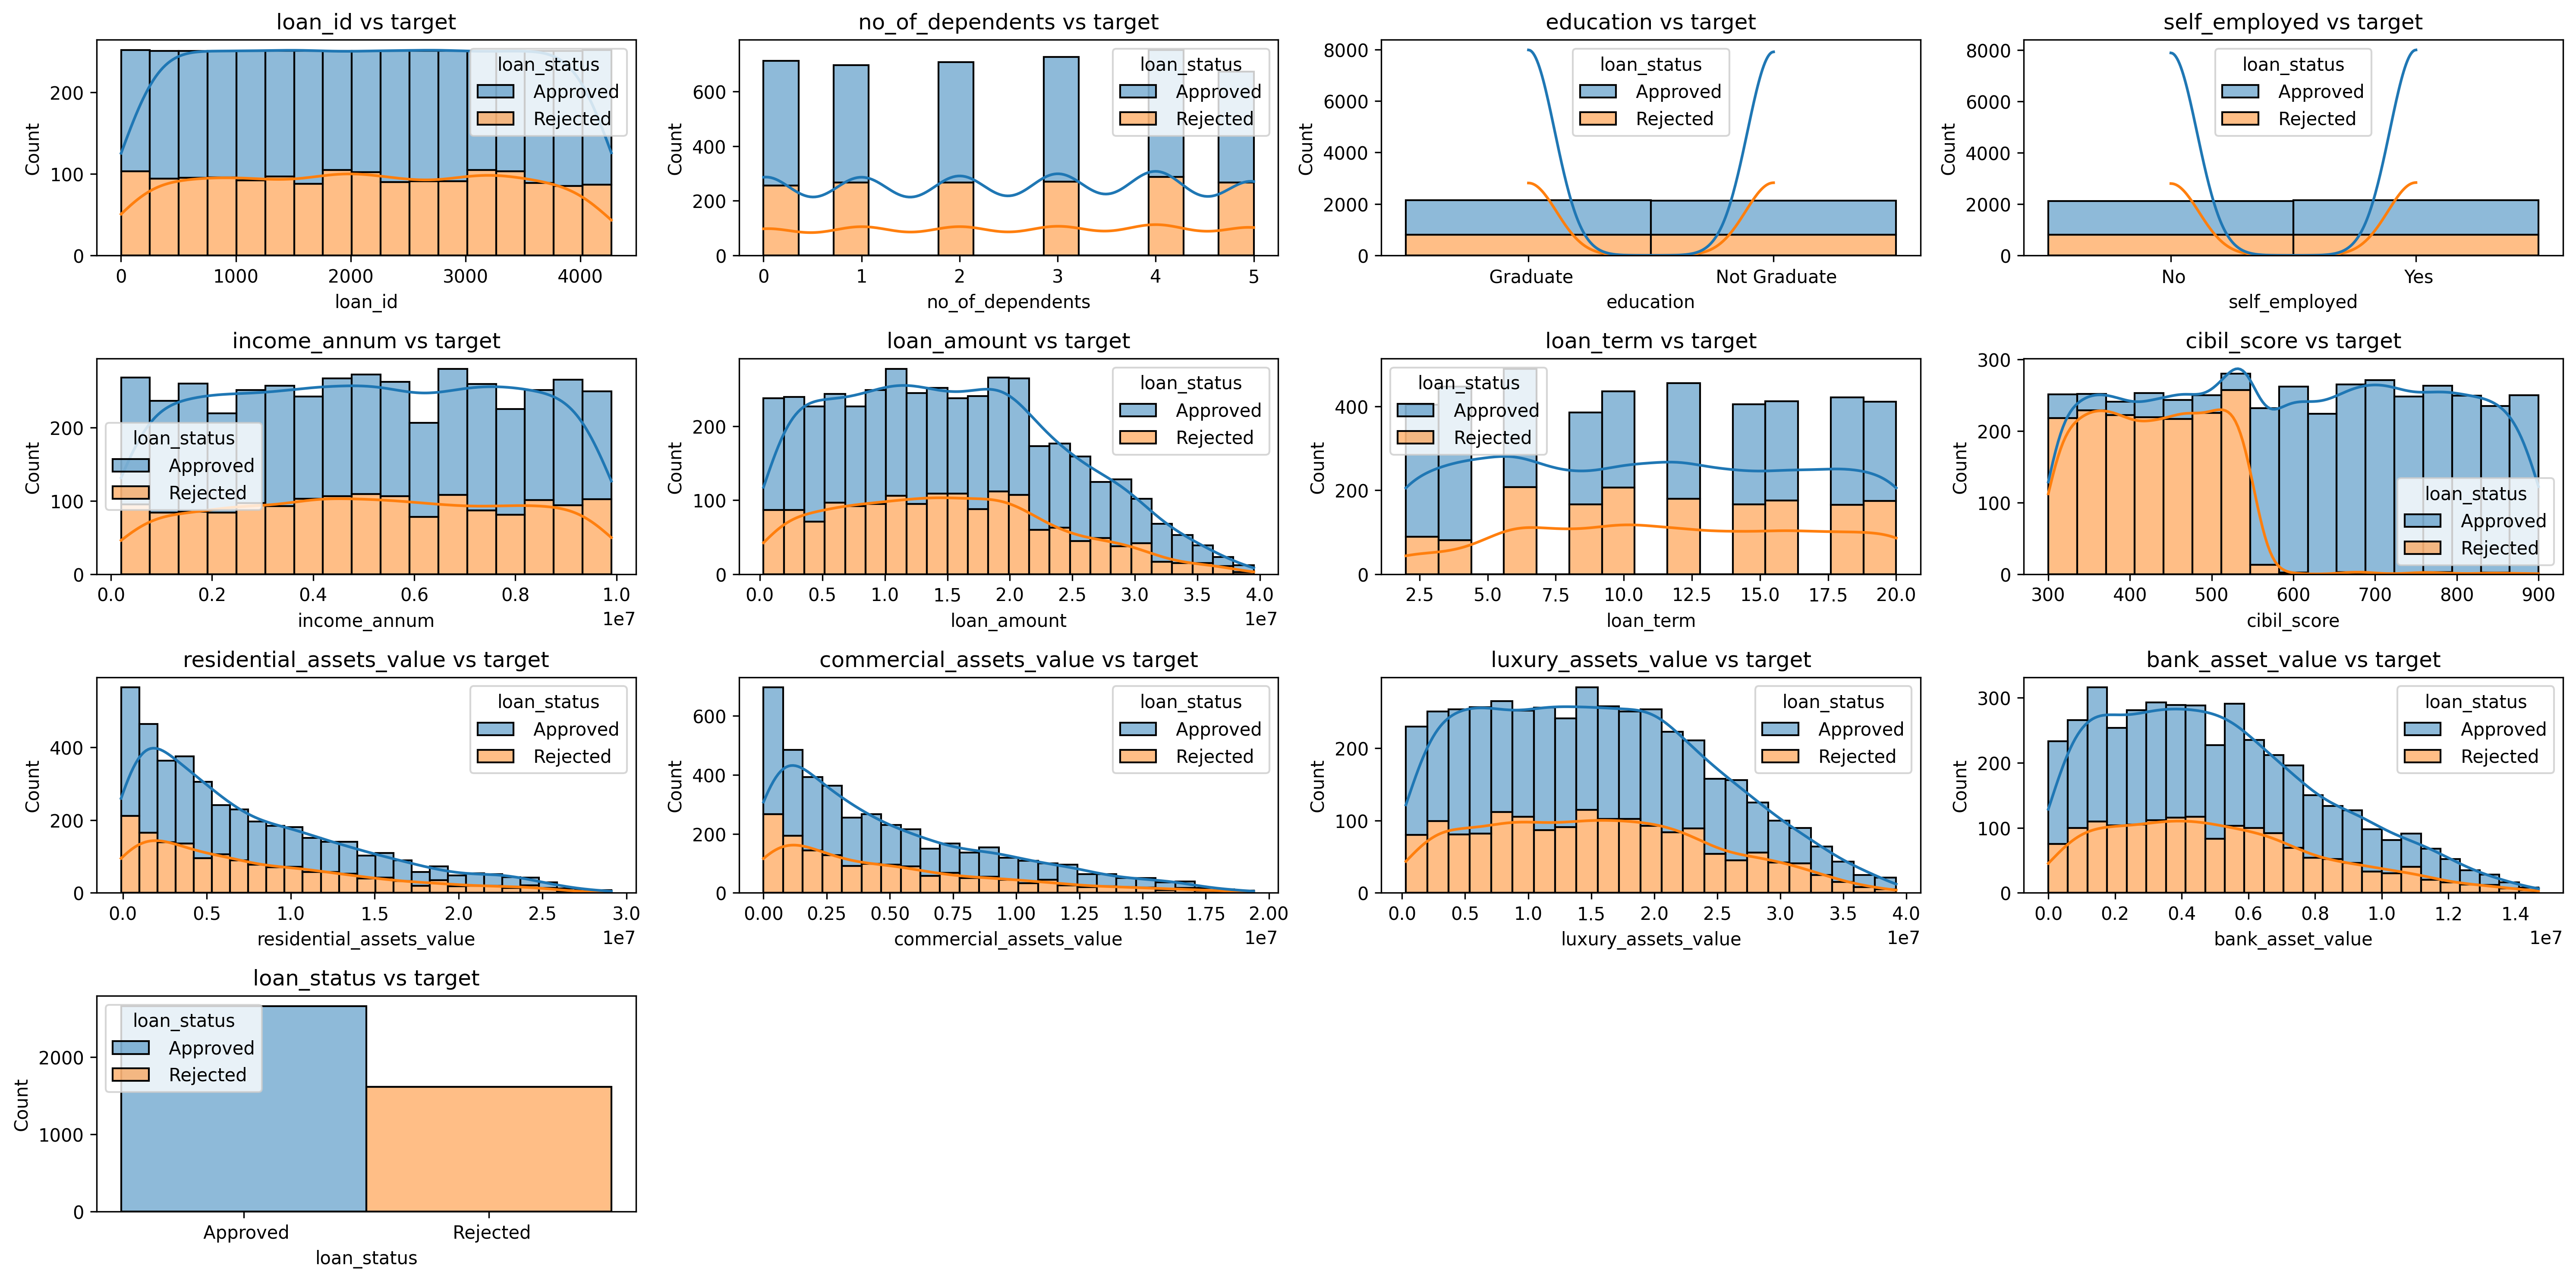

In [ ]:
# subplot for all the columns
columns = loan_dataset.columns
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    sns.histplot(x=col, data=loan_dataset, hue='loan_status', multiple='stack', kde=True)
    plt.xlabel(col)
    plt.title("{} vs target".format(col))
    plt.tight_layout()

In [ ]:
# pairplot for the dataset
sns.pairplot(loan_dataset, hue='loan_status')

# Data Preprocessing & Splitting

In [ ]:
loan_dataset['loan_status']

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [ ]:
# Strip spaces from values in 'education'& 'self_employed' column
loan_dataset['education'] = loan_dataset['education'].str.strip()
loan_dataset['self_employed'] = loan_dataset['self_employed'].str.strip()
loan_dataset['loan_status'] = loan_dataset['loan_status'].str.strip()

In [ ]:
#label encoding
loan_dataset.replace({"loan_status":{'Approved':0,'Rejected':1}},inplace=True)

Approved : 0

Rejected : 1

Splitting the Data

In [ ]:
# seperating the data and labels
X = loan_dataset.drop(columns=['loan_id','loan_status'],axis=1)
y = loan_dataset['loan_status']

In [ ]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(4269, 11) (3415, 11) (854, 11)


In [ ]:
# saving the all columns of training data
all_columns = X_train.columns

In [ ]:
all_columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

One-Hot Encoding

In [ ]:
cat_cols = ['education','self_employed' ]

In [ ]:
#importing OneHotEncoder for preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#loading the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
#fitting the categorical columns to encoder
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

In [ ]:
#storing the encoding columns
encoded_columns = encoder.get_feature_names_out(cat_cols)

In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_train_final_encoded = pd.concat([X_train.drop(cat_cols, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)

In [ ]:
X_train_final_encoded.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,1,3500000,8100000,10,626,7100000,5500000,7200000,2900000,1.0,0.0,0.0,1.0
1,1,2200000,5200000,8,420,2900000,100000,5000000,2300000,0.0,1.0,0.0,1.0
2,3,5300000,19500000,4,591,13200000,4700000,19800000,7900000,0.0,1.0,0.0,1.0
3,0,2900000,9800000,16,395,5400000,4300000,8600000,2400000,1.0,0.0,1.0,0.0
4,4,4500000,15300000,10,843,13200000,6900000,10800000,2200000,1.0,0.0,1.0,0.0


In [ ]:
#checking is there any loss of data
X_train_final_encoded.isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_Graduate          0
education_Not Graduate      0
self_employed_No            0
self_employed_Yes           0
dtype: int64

Standardizing the Data

In [ ]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
# saving the all columns of training data
training_columns = X_train_final_encoded.columns

In [ ]:
#scaling the training data
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_final_encoded)

In [ ]:
print(X_train_encoded)

[[-0.88131127 -0.55907179 -0.7817639  ... -0.99970722 -0.99620048
   0.99620048]
 [-0.88131127 -1.0246154  -1.10251122 ...  1.00029287 -0.99620048
   0.99620048]
 [ 0.30360132  0.08552706  0.47910487 ...  1.00029287 -0.99620048
   0.99620048]
 ...
 [-0.28885497 -1.20367063 -1.29053552 ...  1.00029287 -0.99620048
   0.99620048]
 [-0.28885497 -0.91718226 -0.90342668 ... -0.99970722  1.00381401
  -1.00381401]
 [ 1.48851391  0.87337009 -0.01860649 ...  1.00029287 -0.99620048
   0.99620048]]


In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_scaled = pd.DataFrame(X_train_encoded, columns=training_columns)

In [ ]:
X_train_encoded_scaled.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,-0.881311,-0.559072,-0.781764,-0.156036,0.158077,-0.063925,0.116931,-0.874465,-0.642718,0.999707,-0.999707,-0.996200,0.996200
1,-0.881311,-1.024615,-1.102511,-0.505683,-1.043368,-0.709292,-1.118577,-1.116429,-0.828670,-1.000293,1.000293,-0.996200,0.996200
2,0.303601,0.085527,0.479105,-1.204976,-0.046052,0.873395,-0.066107,0.511329,0.906880,-1.000293,1.000293,-0.996200,0.996200
3,-1.473768,-0.773938,-0.593740,0.892905,-1.189174,-0.325145,-0.157626,-0.720488,-0.797678,0.999707,-0.999707,1.003814,-1.003814
4,0.896058,-0.200961,0.014574,-0.156036,1.423677,0.873395,0.437249,-0.478524,-0.859662,0.999707,-0.999707,1.003814,-1.003814


In [ ]:
#checking the number of rows and columns
X_train_encoded_scaled.shape

(3415, 13)

# Model Selection

Comparing the models with default hyperparameter values using Cross Validation

In [ ]:
# importing the standard classification models from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# all models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier()
}

In [ ]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = cv_score.mean() * 100
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print("="*50)

In [ ]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train_encoded_scaled,y_train)

Model: Logistic Regression
Cross Validation accuracies for the LogisticRegression() = [0.91508053 0.90629575 0.90190337 0.89897511 0.92825769]
Acccuracy score of the  LogisticRegression() = 91.01024890190337 %
Model: KNN
Cross Validation accuracies for the KNeighborsClassifier() = [0.87554905 0.89311859 0.88579795 0.88433382 0.89019034]
Acccuracy score of the  KNeighborsClassifier() = 88.57979502196194 %
Model: Random Forest
Cross Validation accuracies for the RandomForestClassifier() = [0.97071742 0.97657394 0.9795022  0.97510981 0.98389458]
Acccuracy score of the  RandomForestClassifier() = 97.71595900439237 %
Model: SVM
Cross Validation accuracies for the SVC(kernel='linear') = [0.92240117 0.91068814 0.9136164  0.91068814 0.93557833]
Acccuracy score of the  SVC(kernel='linear') = 91.85944363103953 %
Model: XGBoost
Cross Validation accuracies for the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
             

Top 3:

XGBClassifier() = 97.9502196193265 %

RandomForestClassifier() = 97.71595900439237 %

SVC(kernel='linear') = 91.85944363103953 %

# Function for Feature Selection

In [ ]:
#importing the RFE
from sklearn.feature_selection import RFE

In [ ]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5)
    mean_accuracy = cv_score.mean() * 100
    print("Selected columns: ", list(selected_col))
    print(n, mean_accuracy)
    print("----------------------\n")
    return list(selected_col),mean_accuracy

# 1. XG Boost Classifier Model

XG Boost Classifier as the highest accuracy based on cross validation score according to its default hyperparameters

XGBClassifier() = 97.9502196193265 %

In [ ]:
# loading the XG Boost Classifier model
xgb = XGBClassifier()

In [ ]:
# getting the best features of XG Boost Classifier by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train_encoded_scaled,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['cibil_score']
1 95.02196193265009
----------------------

Selected columns:  ['loan_term', 'cibil_score']
2 95.402635431918
----------------------

Selected columns:  ['income_annum', 'loan_term', 'cibil_score']
3 95.19765739385066
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
4 98.21376281112737
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value']
5 98.1844802342606
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value']
6 97.9502196193265
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value']
7 98.00878477306003
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_s

In [ ]:
# using a diffferent df to store
X_train_best_features_xgb = X_train_encoded_scaled[best_features_xgb]

In [ ]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5)
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.97657394 0.97803807 0.98096633 0.98682284 0.98828697]
0.9821376281112737


In [ ]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test Data Preprocessing

In [ ]:
#fitting the categorical columns to encoder
X_test_encoded = encoder.transform(X_test[cat_cols])

In [ ]:
# Create a DataFrame with the encoded features
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_test_final_encoded = pd.concat([X_test.drop(cat_cols, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

In [ ]:
X_test_final_encoded.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,4,5000000,18100000,12,424,5200000,2000000,14500000,6100000,0.0,1.0,0.0,1.0
1,5,5300000,19400000,6,510,14700000,7000000,13600000,3700000,1.0,0.0,1.0,0.0
2,3,8800000,30200000,8,607,13600000,12700000,21500000,5900000,1.0,0.0,0.0,1.0
3,1,1900000,7400000,6,469,1900000,1200000,5900000,1900000,0.0,1.0,1.0,0.0
4,1,3200000,6600000,16,534,8800000,2600000,6500000,1800000,0.0,1.0,1.0,0.0


In [ ]:
#scaling the training data
X_test_scaled = scaler.transform(X_test_final_encoded)

In [ ]:
print(X_test_scaled)

[[ 0.89605762 -0.02190608  0.32426134 ...  1.00029287 -0.99620048
   0.99620048]
 [ 1.48851391  0.08552706  0.46804462 ... -0.99970722  1.00381401
  -1.00381401]
 [ 0.30360132  1.3389137   1.66255188 ... -0.99970722 -0.99620048
   0.99620048]
 ...
 [ 0.89605762  0.98080323  1.15378027 ... -0.99970722 -0.99620048
   0.99620048]
 [-0.88131127 -1.74083634 -1.63340334 ... -0.99970722 -0.99620048
   0.99620048]
 [ 1.48851391 -0.20096132 -0.27299229 ...  1.00029287 -0.99620048
   0.99620048]]


In [ ]:
X_test_encoded_scaled = pd.DataFrame(X_test_scaled, columns=training_columns)

In [ ]:
X_test_encoded_scaled.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,0.896058,-0.021906,0.324261,0.193611,-1.020039,-0.355877,-0.683861,-0.071584,0.349025,-1.000293,1.000293,-0.996200,0.996200
1,1.488514,0.085527,0.468045,-0.855329,-0.518465,1.103883,0.460128,-0.170570,-0.394782,0.999707,-0.999707,1.003814,-1.003814
2,0.303601,1.338914,1.662552,-0.505683,0.047264,0.934858,1.764276,0.698301,0.287041,0.999707,-0.999707,-0.996200,0.996200
3,-0.881311,-1.132049,-0.859186,-0.855329,-0.757587,-0.862951,-0.866899,-1.017444,-0.952638,-1.000293,1.000293,1.003814,-1.003814
4,-0.881311,-0.666505,-0.947668,0.892905,-0.378490,0.197295,-0.546582,-0.951454,-0.983630,-1.000293,1.000293,1.003814,-1.003814


In [ ]:
#checking the number of rows and columns
X_test_encoded_scaled.shape

(854, 13)

In [ ]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test_encoded_scaled[best_features_xgb]

In [ ]:
best_features_xgb

['income_annum', 'loan_amount', 'loan_term', 'cibil_score']

In [ ]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [ ]:
# importing the classification report for evaluation
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       531
           1       1.00      0.99      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [ ]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(confusion_matrix(y_test, y_predict_xgb))

[[530   1]
 [  4 319]]


#Hyperparameter Tuning : XG Boost Classifier

In [ ]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters for XG Boost Classifier
params_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1,2,3,4,5],
    }

In [ ]:
# fitting the data and model to grid search cv
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300} 0.9838945827232797


In [ ]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)
print(classification_report(y_test, y_predict_grid_xgb))
print(confusion_matrix(y_test, y_predict_grid_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       1.00      0.98      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

[[530   1]
 [  5 318]]


Best Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

# Final Model : XG Boost Classifier

In [ ]:
# loading the model with best hyper parameter
model1 = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 300)

In [ ]:
# fitting the training data with best features of xgb
model1.fit(X_train_best_features_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Model Evaluation : XG Boost Classifier

In [ ]:
# predicting the test data
y_predict_model1 = model1.predict(X_test_best_features_xgb)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       1.00      0.98      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [ ]:
# loading the accuracy score for evaluation
from sklearn.metrics import accuracy_score

In [ ]:
#model1 accuracy on training data
y_train_predict_model1 = model1.predict(X_train_best_features_xgb)
train_data_accuracy_model1 = accuracy_score(y_train_predict_model1, y_train)
print('Accuracy on training data: ',train_data_accuracy_model1 )

Accuracy on training data:  0.9991215226939971


In [ ]:
# classification report on training data of model1
print(classification_report(y_train, y_train_predict_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2125
           1       1.00      1.00      1.00      1290

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



In [ ]:
#setting parameters for clearer image
plt.rcParams['figure.dpi'] = 100

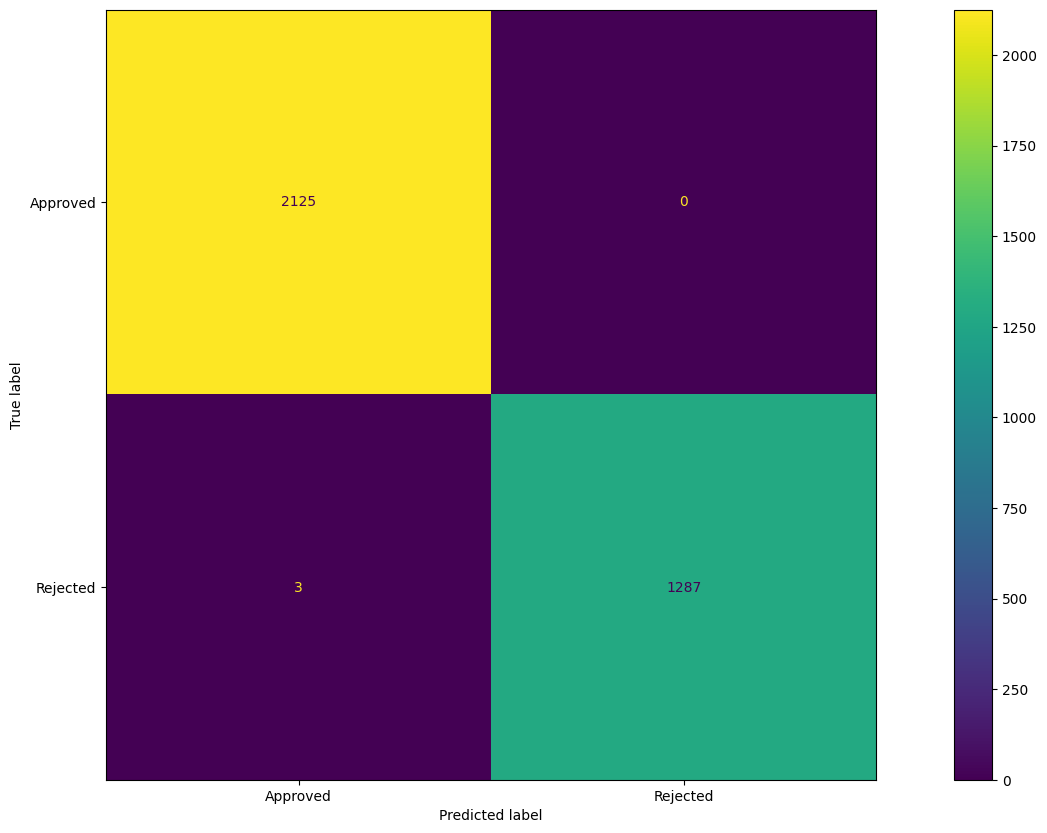

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model1)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model1 accuracy on test data
y_test_predict_model1 = model1.predict(X_test_best_features_xgb)
test_data_accuracy_model1 = accuracy_score(y_test_predict_model1, y_test)
print('Accuracy on test data: ',test_data_accuracy_model1 )

Accuracy on test data:  0.9929742388758782


In [ ]:
#classification report on test data of model1
print(classification_report(y_test, y_test_predict_model1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       1.00      0.98      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



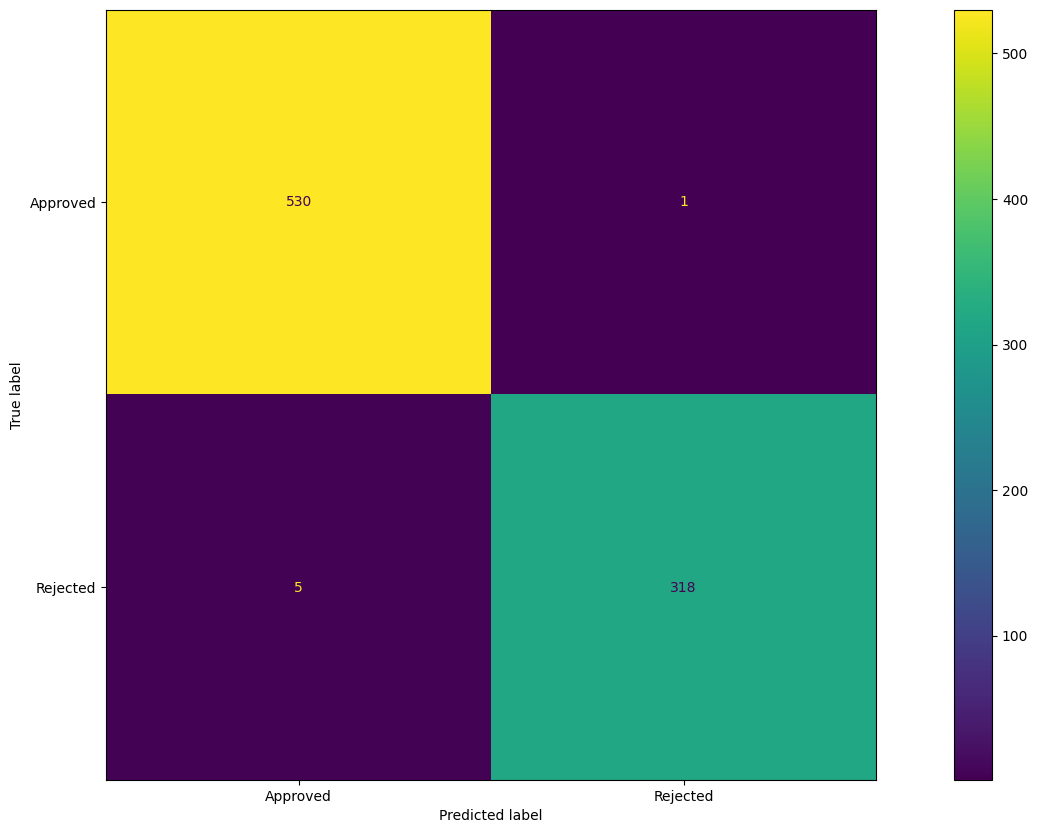

In [ ]:
# confusion matrix of test data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model1)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

# 2. Random Forest Classifier Model

Random Forest Classifier has the 2nd highest accuracy based on cross validation score according to its default hyperparameters

RandomForestClassifier() = 97.71595900439237 %

In [ ]:
# loading the Random Forest Classifier model
rfc = RandomForestClassifier()

In [ ]:
# getting the best features of RFC by calling the feature selection function
best_score_rfc = 0
best_features_rfc = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,rfc,X_train_encoded_scaled,y_train)
    if best_score_rfc < score:
        best_score_rfc = score
        best_features_rfc = col
print(best_features_rfc)
print(best_score_rfc)

Selected columns:  ['cibil_score']
1 94.23133235724744
----------------------

Selected columns:  ['loan_term', 'cibil_score']
2 95.25622254758419
----------------------

Selected columns:  ['loan_amount', 'loan_term', 'cibil_score']
3 95.69546120058567
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
4 97.97950219619325
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value']
5 98.24304538799413
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'luxury_assets_value']
6 98.00878477306003
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value']
7 98.00878477306003
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',

Best Features : ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value']

In [ ]:
# using a diffferent df to store
X_train_best_features_rfc = X_train_encoded_scaled[best_features_rfc]

In [ ]:
# getting the cross val score of rfc with its best features
cv_score_rfc = cross_val_score(rfc, X_train_best_features_rfc, y_train, cv=5)
print(cv_score_rfc)
print(cv_score_rfc.mean())

[0.97364568 0.98096633 0.98535871 0.98535871 0.98828697]
0.982723279648609


In [ ]:
# fitting the default model with its best features
rfc.fit(X_train_best_features_rfc,y_train)

RandomForestClassifier()

In [ ]:
# taking only best features of rfc to test data
X_test_best_features_rfc = X_test_encoded_scaled[best_features_rfc]

In [ ]:
best_features_rfc

['income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'luxury_assets_value']

In [ ]:
# predicting the labels on test data
y_predict_rfc = rfc.predict(X_test_best_features_rfc)

In [ ]:
# the classification report for evaluation
print(classification_report(y_test, y_predict_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       531
           1       0.99      0.98      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [ ]:
# the confusion matrix
print(confusion_matrix(y_test, y_predict_rfc))

[[529   2]
 [  7 316]]


# Hyperparameter Tuning : Random Forest Classifier

In [ ]:
#setting the hyperparameters
params_rfc = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

In [ ]:
# fitting the data and model to grid search cv
grid_rfc = GridSearchCV(estimator=rfc, param_grid=params_rfc, cv=5, n_jobs=-1)
grid_rfc.fit(X_train_best_features_rfc,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_rfc.best_estimator_, grid_rfc.best_params_, grid_rfc.best_score_)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300) {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300} 0.9841874084919475


In [ ]:
# testing grid_rfc model on test data
y_predict_grid_rfc = grid_rfc.predict(X_test_best_features_rfc)
print(classification_report(y_test, y_predict_grid_rfc))
print(confusion_matrix(y_test, y_predict_grid_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.99      0.98      0.98       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

[[527   4]
 [  6 317]]


Best Parameters :{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


# Final Model : Random Forest Classifier

In [ ]:
# loading the model with best hyper parameter
model2 = RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300)

In [ ]:
# fitting the training data with best features of rfc
model2.fit(X_train_best_features_rfc,y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300)

# Model Evaluation :Random Forest Classifier

In [ ]:
# predicting the test data
y_predict_model2 = model2.predict(X_test_best_features_rfc)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.99      0.98      0.98       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [ ]:
#model3 accuracy on training data
y_train_predict_model2 = model2.predict(X_train_best_features_rfc)
train_data_accuracy_model2 = accuracy_score(y_train_predict_model2, y_train)
print('Accuracy on training data: ',train_data_accuracy_model2 )

Accuracy on training data:  0.9961932650073206


In [ ]:
# classification report on training data of model2
print(classification_report(y_train, y_train_predict_model2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2125
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      3415
   macro avg       1.00      0.99      1.00      3415
weighted avg       1.00      1.00      1.00      3415



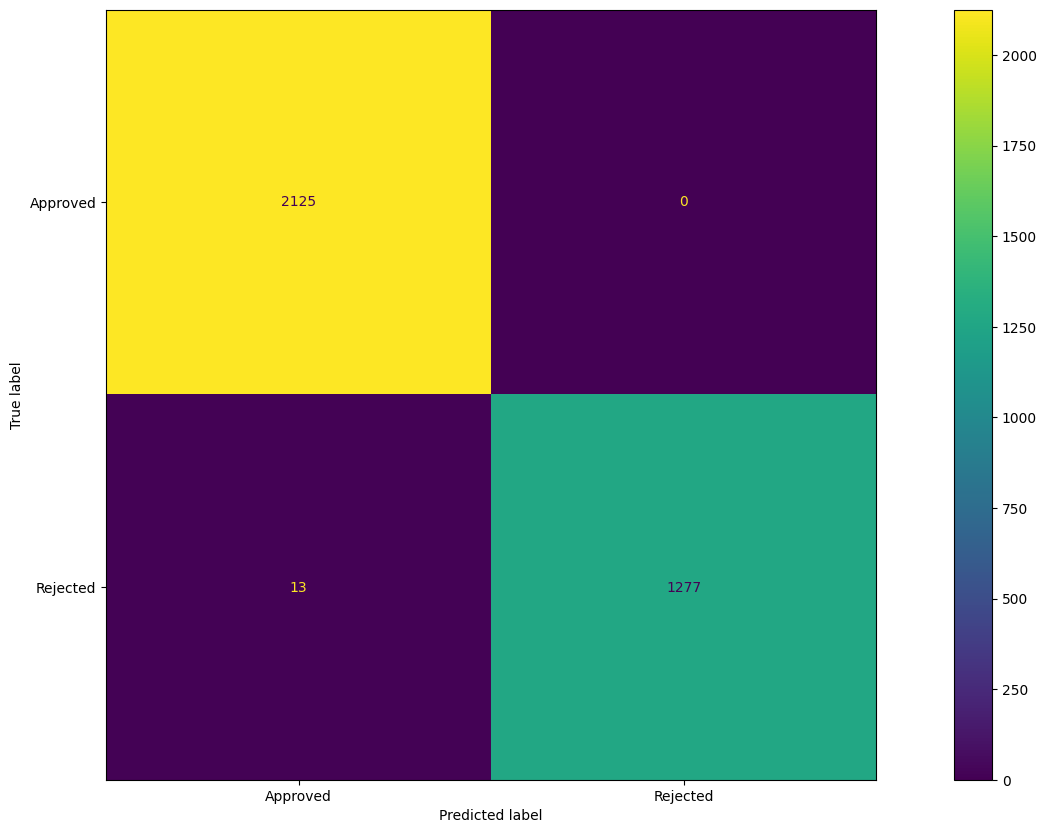

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model2)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model2 accuracy on test data
y_test_predict_model2 = model2.predict(X_test_best_features_rfc)
test_data_accuracy_model2 = accuracy_score(y_test_predict_model2, y_test)
print('Accuracy on test data: ',test_data_accuracy_model2 )

Accuracy on test data:  0.9871194379391101


In [ ]:
#classification report on test data of model2
print(classification_report(y_test, y_test_predict_model2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.99      0.98      0.98       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



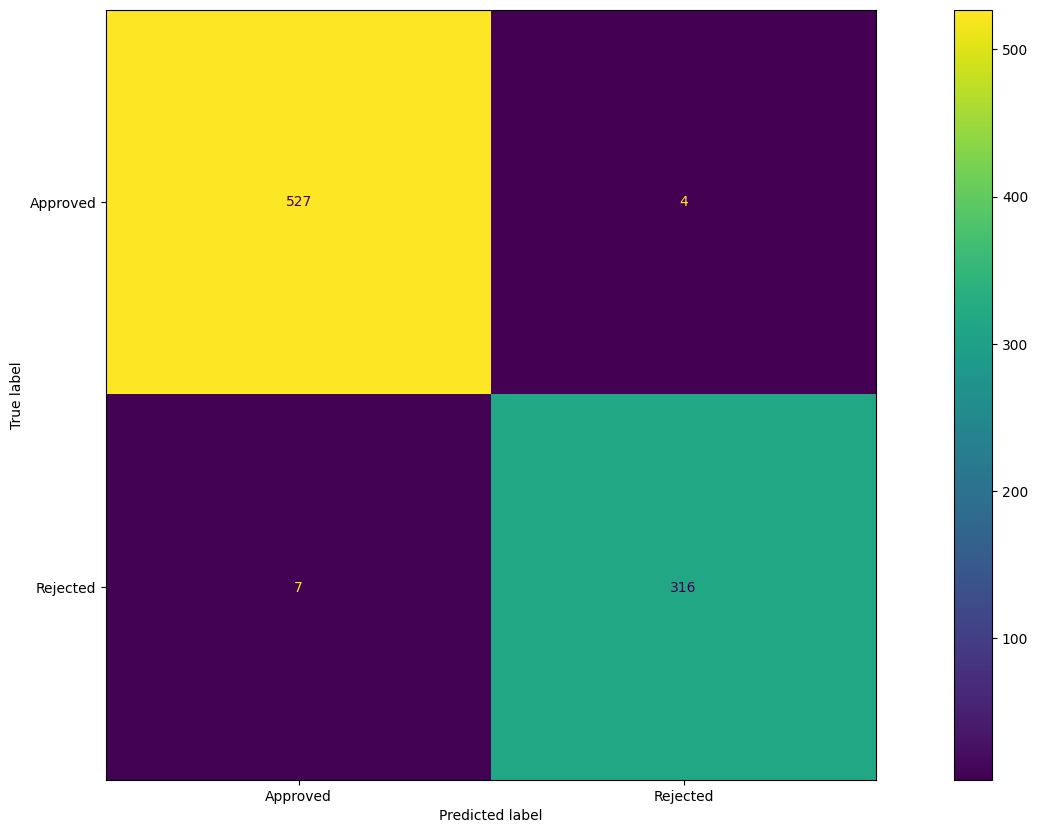

In [ ]:
# confusion matrix of test data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model2)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

# 3. Support Vector Classifier Model

Support Vector Classifier as the 3rd highest accuracy based on cross validation score according to its default hyperparameters

SVC(kernel='linear') = 91.85944363103953 %

In [ ]:
# loading the Support Vector Classifier Model
svc = SVC(kernel='linear')

In [ ]:
# getting the best features of Support Vector Classifier Model by calling the feature selection function
best_score_svc = 0
best_features_svc = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,svc,X_train_encoded_scaled,y_train)
    if best_score_svc < score:
        best_score_svc = score
        best_features_svc = col
print(best_features_svc)
print(best_score_svc)

Selected columns:  ['cibil_score']
1 92.59150805270863
----------------------

Selected columns:  ['loan_amount', 'cibil_score']
2 92.65007320644217
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'cibil_score']
3 92.3865300146413
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
4 92.12298682284042
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value']
5 92.03513909224013
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value', 'education_Not Graduate']
6 92.06442166910689
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate']
7 92.06442166910686
----------------------

Selected columns:  ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'comme

Best Features : ['loan_amount', 'cibil_score']

In [ ]:
# using a diffferent df to store
X_train_best_features_svc = X_train_encoded_scaled[best_features_svc]

In [ ]:
# getting the cross val score of svc with its best features
cv_score_svc = cross_val_score(svc, X_train_best_features_svc, y_train, cv=5)
print(cv_score_svc)
print(cv_score_svc.mean())

[0.91068814 0.93265007 0.92679356 0.91215227 0.95021962]
0.9265007320644217


In [ ]:
# fitting the default model with its best features
svc.fit(X_train_best_features_svc,y_train)

SVC(kernel='linear')

In [ ]:
# taking only best features of svc to test data
X_test_best_features_svc = X_test_encoded_scaled[best_features_svc]

In [ ]:
best_features_svc

['loan_amount', 'cibil_score']

In [ ]:
# predicting the labels on test data
y_predict_svc = svc.predict(X_test_best_features_svc)

In [ ]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       531
           1       0.91      0.95      0.93       323

    accuracy                           0.95       854
   macro avg       0.94      0.95      0.94       854
weighted avg       0.95      0.95      0.95       854



In [ ]:
print(confusion_matrix(y_test, y_predict_svc))

[[501  30]
 [ 15 308]]


# Hyperparameter Tuning : Support Vector Classifier Model

In [ ]:
params_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001]
    }

In [ ]:
# fitting the data and model to grid search cv
grid_svc = GridSearchCV(estimator=svc, param_grid=params_svc, cv=5, n_jobs=-1)
grid_svc.fit(X_train_best_features_svc,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# getting the best hyperparameters
print(grid_svc.best_estimator_, grid_svc.best_params_, grid_svc.best_score_)

SVC(C=10, gamma=1) {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 0.9455344070278183


In [ ]:
# testing grid_svc model on test data
y_predict_grid_svc = grid_svc.predict(X_test_best_features_svc)
print(classification_report(y_test, y_predict_grid_svc))
print(confusion_matrix(y_test, y_predict_grid_svc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       531
           1       0.90      0.99      0.94       323

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854

[[497  34]
 [  4 319]]


Best Parameters : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

# Final Model : Support Vector Classifier Model

In [ ]:
# loading the model with best hyper parameter
model3 = SVC(C=10, gamma=1)

In [ ]:
# fitting the training data with best features of lr
model3.fit(X_train_best_features_svc,y_train)

SVC(C=10, gamma=1)

# Model Evaluation : Support Vector Classifier Model

In [ ]:
# predicting the test data
y_predict_model3 = model3.predict(X_test_best_features_svc)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model3))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       531
           1       0.90      0.99      0.94       323

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854



In [ ]:
#model1 accuracy on training data
y_train_predict_model3 = model3.predict(X_train_best_features_svc)
train_data_accuracy_model3 = accuracy_score(y_train_predict_model3, y_train)
print('Accuracy on training data: ',train_data_accuracy_model3 )

Accuracy on training data:  0.9481698389458272


In [ ]:
# classification report on training data of model3
print(classification_report(y_train, y_train_predict_model3))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2125
           1       0.89      0.98      0.93      1290

    accuracy                           0.95      3415
   macro avg       0.94      0.95      0.95      3415
weighted avg       0.95      0.95      0.95      3415



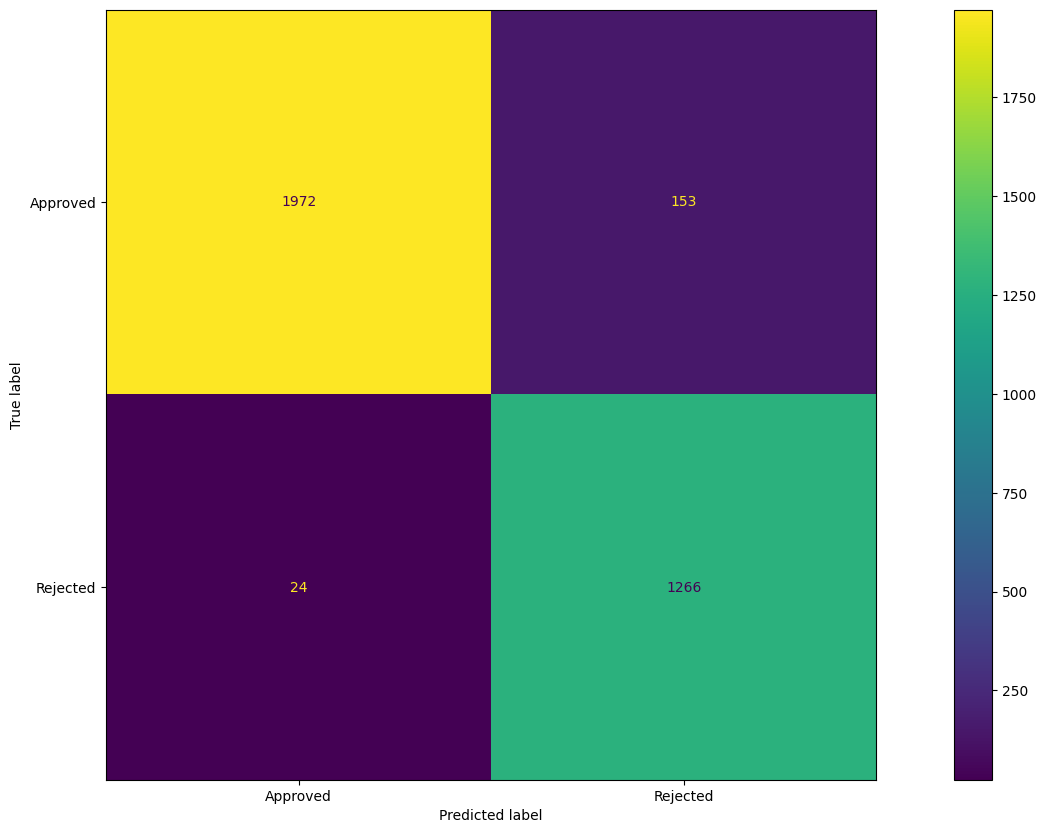

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model3)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model3 accuracy on test data
y_test_predict_model3 = model3.predict(X_test_best_features_svc)
test_data_accuracy_model3 = accuracy_score(y_test_predict_model3,y_test)
print('Accuracy on test data: ',test_data_accuracy_model3 )

Accuracy on test data:  0.955503512880562


In [ ]:
#classification report on test data of model3
print(classification_report(y_test,y_test_predict_model3))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       531
           1       0.90      0.99      0.94       323

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854



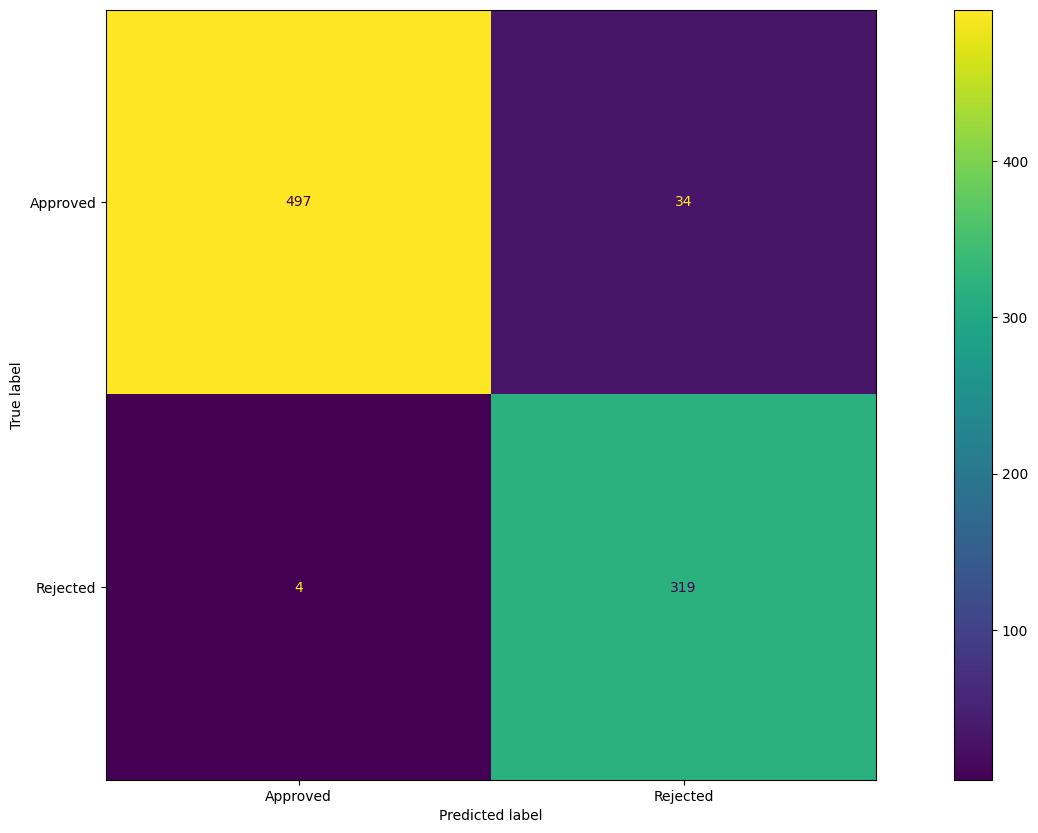

In [ ]:
# confusion matrix of testing data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model3)
disp = ConfusionMatrixDisplay(cm, display_labels=['Approved', 'Rejected'])
disp.plot(ax=ax)
plt.show()

# Conclusion

Model 1 : XG Boost Classifier Model

Training Data Accuracy : 99.912%

Testing Data Accuracy : 99.297%


Model 2 :Random Forest Classifier

Training Data Accuracy : 99.970%

Testing Data Accuracy : 98.829%


Model 3 : Logistic Regression

Training Data Accuracy : 94.816%

Testing Data Accuracy : 95.550%

# Predictive System

Buliding a Predictive System for here

In [ ]:
#taking input data
input_data = (5, 'Graduate', 'No',9400000,27900000,4,870,1100000,200000,29500000,10400000)

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Convert the categorical columns to string type
df[cat_cols] = df[cat_cols].astype('str')

# Encode the categorical columns
input_data_encoded = encoder.transform(df[cat_cols])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_cols, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfc = input_data_df[best_features_rfc]
df_best_features_svc = input_data_df[best_features_svc]

#predictions
prediction1 = model1.predict(df_best_features_xgb)
prediction2 = model2.predict(df_best_features_rfc)
prediction3 = model3.predict(df_best_features_svc)

# Print the predictions
print(prediction1)
if(prediction1[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')
print(prediction2)
if(prediction2[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')
print(prediction3)
if(prediction3[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')

[0]
The Loan of the Person is Accepted
[0]
The Loan of the Person is Accepted
[0]
The Loan of the Person is Accepted


In [ ]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('cat_columns.pkl', 'wb') as file:
    pickle.dump(cat_cols, file)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)
with open('training_columns.pkl', 'wb') as file:
    pickle.dump(training_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('best_features_rfc.json', 'w') as file:
    json.dump(best_features_rfc, file)
with open('best_features_svc.json', 'w') as file:
    json.dump(best_features_svc, file)
with open('loan_status_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('loan_status_trained_rfc_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('loan_status_trained_svc_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [ ]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_columns_sm = pickle.load(f)
with open('cat_columns.pkl', 'rb') as f:
    cat_columns_sm = pickle.load(f)
with open('encoder.pkl', 'rb') as f:
    encoder_sm = pickle.load(f)
with open('encoded_columns.pkl', 'rb') as f:
    encoded_columns_sm = pickle.load(f)
with open('training_columns.pkl', 'rb') as f:
    training_columns_sm = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler_sm = pickle.load(f)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('best_features_rfc.json', 'r') as file:
    best_features_rfc = json.load(file)
with open('best_features_svc.json', 'r') as file:
    best_features_svc = json.load(file)
with open('loan_status_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)
with open('loan_status_trained_rfc_model.sav', 'rb') as f:
    loaded_model_rfc = pickle.load(f)
with open('loan_status_trained_svc_model.sav', 'rb') as f:
    loaded_model_svc = pickle.load(f)

In [ ]:
#taking input data
input_data = (5, 'Graduate', 'No',9400000,27900000,4,870,1100000,200000,29500000,10400000)

#loading columns
columns = all_columns_sm

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Convert the categorical columns to string type
df[cat_columns_sm] = df[cat_columns_sm].astype('str')

# Encode the categorical columns
input_data_encoded = encoder_sm.transform(df[cat_columns_sm])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns_sm)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_columns_sm, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler_sm.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns_sm)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfc = input_data_df[best_features_rfc]
df_best_features_svc = input_data_df[best_features_svc]

#predictions
prediction1 = loaded_model_xgb.predict(df_best_features_xgb)
prediction2 = loaded_model_rfc.predict(df_best_features_rfc)
prediction3 = loaded_model_svc.predict(df_best_features_svc)

# Print the predictions
print(prediction1)
if(prediction1[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')
print(prediction2)
if(prediction2[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')
print(prediction3)
if(prediction3[0]==0):
  print('The Loan of the Person is Accepted')
else:
  print('The Loan of the Person is Rejected')

[0]
The Loan of the Person is Accepted
[0]
The Loan of the Person is Accepted
[0]
The Loan of the Person is Accepted
